<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Making-plots-with-plotnine" data-toc-modified-id="Making-plots-with-plotnine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Making plots with plotnine</a></span><ul class="toc-item"><li><span><a href="#Survey-Metadata" data-toc-modified-id="Survey-Metadata-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Survey Metadata</a></span></li><li><span><a href="#Draw-the-plot" data-toc-modified-id="Draw-the-plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Draw the plot</a></span></li><li><span><a href="#Challenge:-Bar-chart" data-toc-modified-id="Challenge:-Bar-chart-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Challenge: Bar chart</a></span></li></ul></li><li><span><a href="#Building-your-plots-iteratively" data-toc-modified-id="Building-your-plots-iteratively-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building your plots iteratively</a></span><ul class="toc-item"><li><span><a href="#Add-transparency-with-alpha" data-toc-modified-id="Add-transparency-with-alpha-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Add transparency with <code>alpha</code></a></span></li><li><span><a href="#Add-color-for-all-points" data-toc-modified-id="Add-color-for-all-points-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Add color for all points</a></span></li><li><span><a href="#Add-a-different-color-for-each-species" data-toc-modified-id="Add-a-different-color-for-each-species-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Add a different color for each species</a></span></li><li><span><a href="#Add-units-to-the-x-label" data-toc-modified-id="Add-units-to-the-x-label-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Add units to the <code>x</code> label</a></span></li><li><span><a href="#Log-scale-for-X-axis" data-toc-modified-id="Log-scale-for-X-axis-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Log-scale for X-axis</a></span></li><li><span><a href="#Changing-the-background-to-white-with-theme_bw" data-toc-modified-id="Changing-the-background-to-white-with-theme_bw-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Changing the background to white with <code>theme_bw</code></a></span><ul class="toc-item"><li><span><a href="#Change-the-text-size-with-theme" data-toc-modified-id="Change-the-text-size-with-theme-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Change the text size with <code>theme</code></a></span></li></ul></li></ul></li><li><span><a href="#Plotting-Distributions" data-toc-modified-id="Plotting-Distributions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting Distributions</a></span><ul class="toc-item"><li><span><a href="#Add-individual-observations-to-the-boxplot-with-geom_jitter" data-toc-modified-id="Add-individual-observations-to-the-boxplot-with-geom_jitter-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Add individual observations to the boxplot with <code>geom_jitter</code></a></span></li></ul></li><li><span><a href="#Plotting-Time-Series-Data" data-toc-modified-id="Plotting-Time-Series-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting Time Series Data</a></span></li></ul></div>

# Making plots with plotnine

In [2]:
!pip install plotnine

    100% |████████████████████████████████| 3.6MB 1.9MB/s 
    100% |████████████████████████████████| 61kB 12.2MB/s 


In [4]:
%matplotlib inline
import pandas as pd
import plotnine as p9

## Survey Metadata

Column|Description
------|----------
record_id|Unique id for the observation
month|month of observation
day|day of observation
year|year of observation
plot_id|ID of a particular site
species_id|2-letter code
sex|sex of animal (“M”, “F”)
hindfoot_length|length of the hindfoot in mm
weight|weight of the animal in grams

In [7]:
surveys_complete = pd.read_csv('https://tinyurl.com/surveys-csv').dropna()
surveys_complete

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
67,68,8,19,1977,8,DO,F,32.0,52.0
68,69,8,19,1977,2,PF,M,15.0,8.0
69,70,8,19,1977,3,OX,F,21.0,22.0
70,71,8,19,1977,7,DM,F,36.0,35.0
73,74,8,19,1977,8,PF,M,12.0,7.0


To build a `plotnine` graphic we need to:
* Bind the plot to a specific dataframe using the data argument

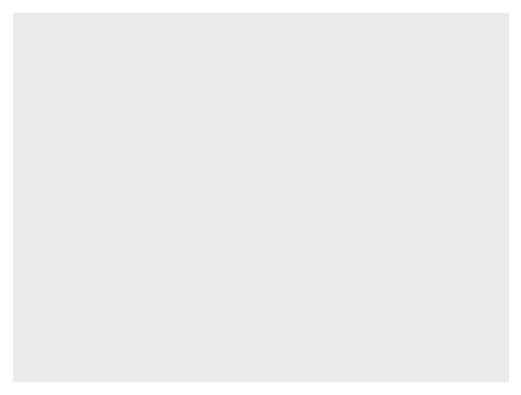

<ggplot: (7546763689)>

In [8]:
(p9.ggplot(data=surveys_complete))

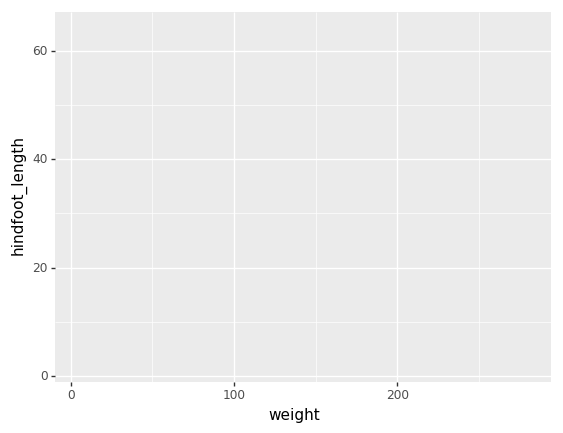

<ggplot: (-9223372029305056652)>

In [9]:
(p9.ggplot(data=surveys_complete,
          mapping=p9.aes(x='weight', y='hindfoot_length')))

The most important `aes` mappings are `x, y, alpha, color, colour, fill, linetype, shape, size, and stroke`

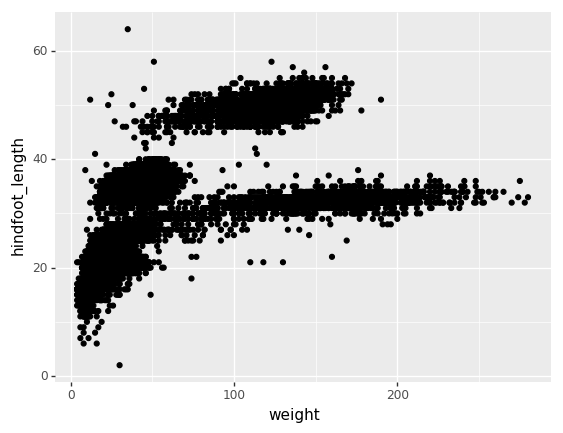

<ggplot: (-9223372029305771120)>

In [16]:
(p9.ggplot(data=surveys_complete,
          mapping=p9.aes(x='weight', y='hindfoot_length'))
     + p9.geom_point())

In [17]:
surveys_plot = p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length'))

## Draw the plot

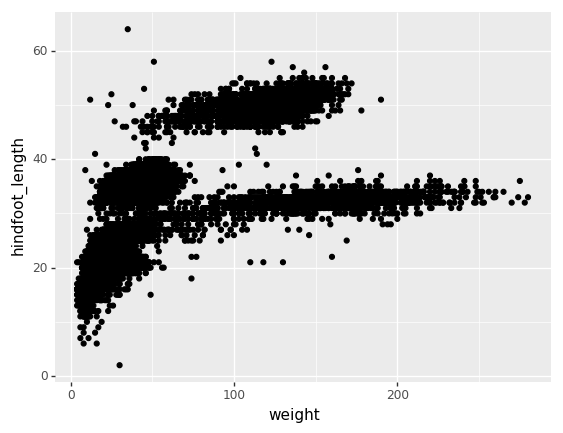

<ggplot: (7549004552)>

In [18]:
surveys_plot + p9.geom_point()

## Challenge: Bar chart

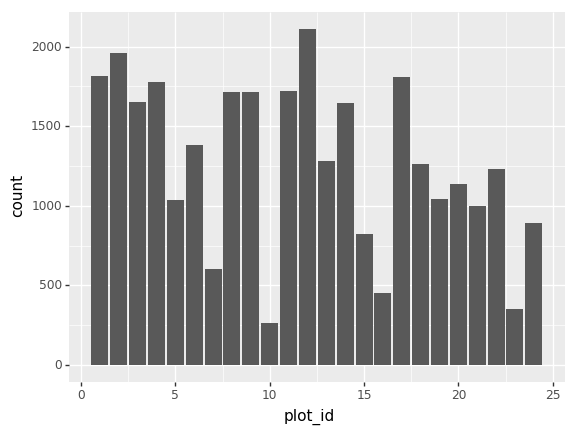

<ggplot: (-9223372029306786567)>

In [19]:
plot_id_plot = p9.ggplot(data=surveys_complete,
                        mapping=p9.aes('plot_id'))
plot_id_plot + p9.geom_bar()

# Building your plots iteratively

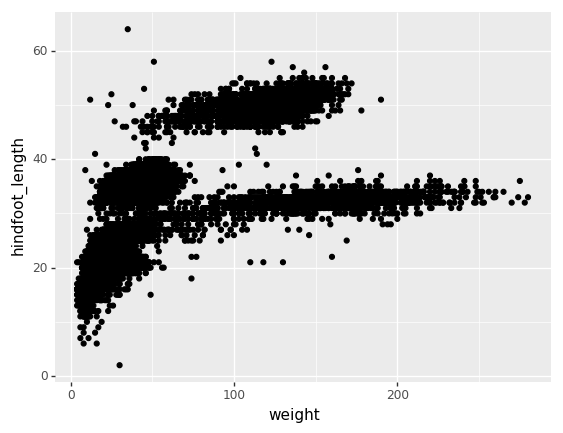

<ggplot: (-9223372029305310548)>

In [36]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length'))
 + p9.geom_point()
)

## Add transparency with `alpha`

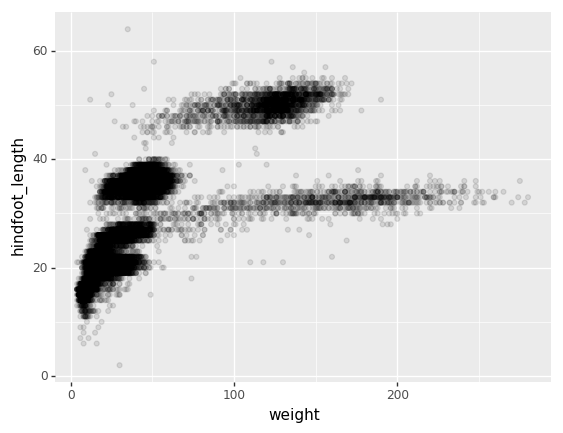

<ggplot: (-9223372029305310478)>

In [37]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length'))
 + p9.geom_point(alpha=0.1)
)

## Add color for all points

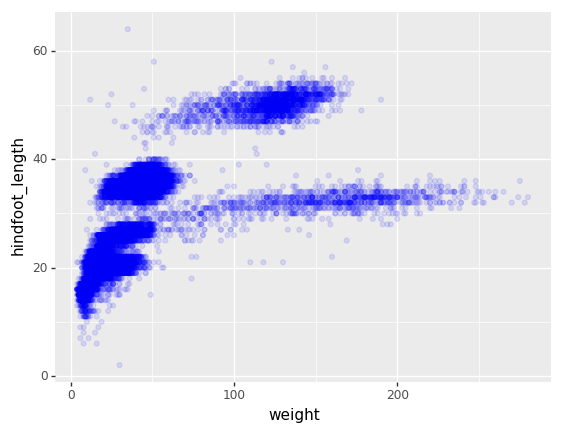

<ggplot: (7549787414)>

In [38]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length'))
 + p9.geom_point(alpha=0.1, color='blue')
)

## Add a different color for each species

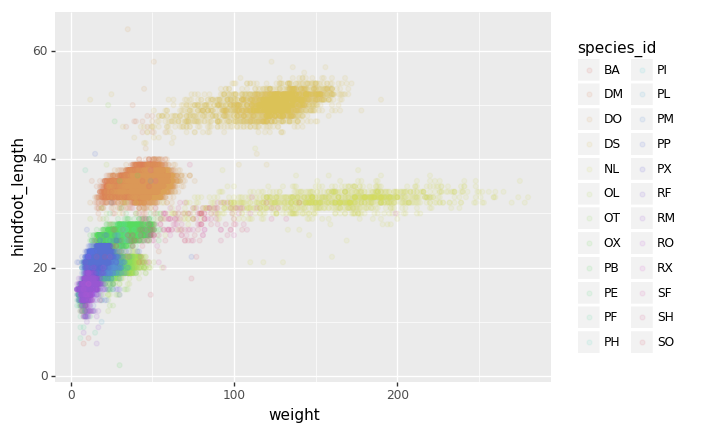

<ggplot: (-9223372029304988230)>

In [39]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length',
                                      color='species_id'))
 + p9.geom_point(alpha=0.1)
)

## Add units to the `x` label

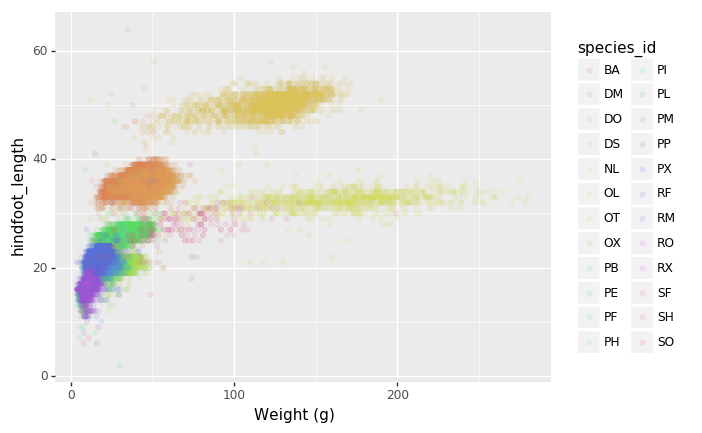

<ggplot: (7549777598)>

In [40]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length',
                                      color='species_id'))
 + p9.geom_point(alpha=0.1)
 + p9.xlab('Weight (g)')
)

## Log-scale for X-axis

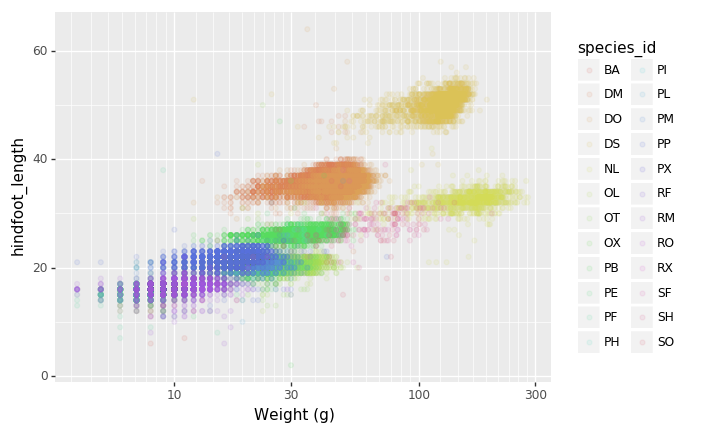

<ggplot: (7555585337)>

In [41]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length',
                                      color='species_id'))
 + p9.geom_point(alpha=0.1)
 + p9.xlab('Weight (g)')
 + p9.scale_x_log10()
)

## Changing the background to white with `theme_bw`

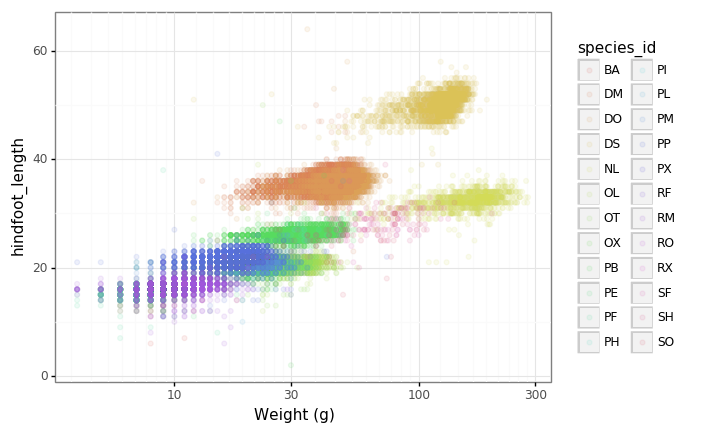

<ggplot: (-9223372029294839324)>

In [43]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length',
                                      color='species_id'))
 + p9.geom_point(alpha=0.1)
 + p9.xlab('Weight (g)')
 + p9.scale_x_log10()
 + p9.theme_bw()
)

### Change the text size with `theme`

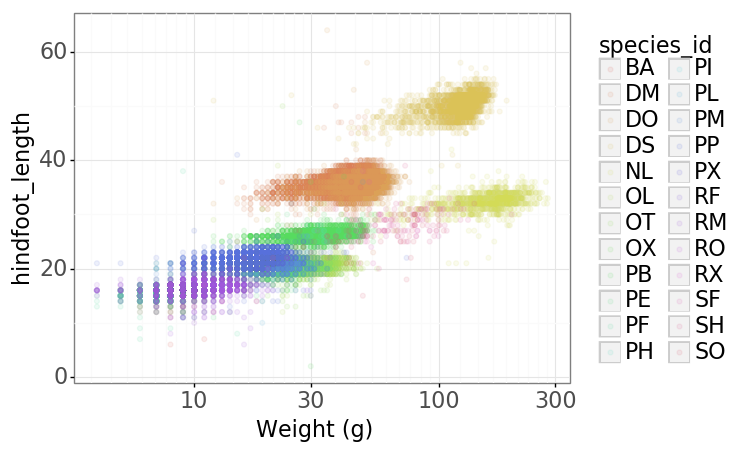

<ggplot: (7557673578)>

In [45]:
(p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                      y='hindfoot_length',
                                      color='species_id'))
 + p9.geom_point(alpha=0.1)
 + p9.xlab('Weight (g)')
 + p9.scale_x_log10()
 + p9.theme_bw()
 + p9.theme(text=p9.element_text(size=16))
)

# Plotting Distributions

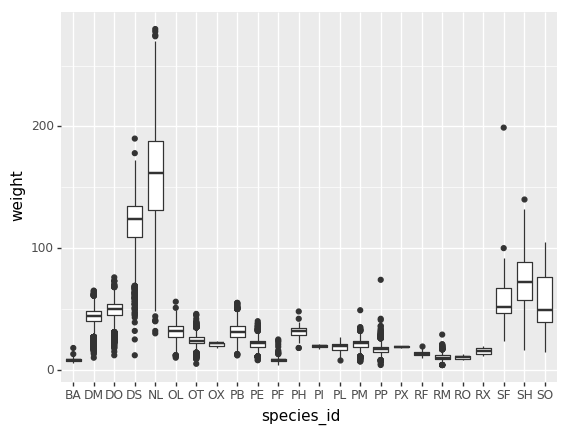

<ggplot: (7549411020)>

In [46]:
weight_vs_species_id = p9.ggplot(data=surveys_complete,
                                 mapping=p9.aes(x='species_id',
                                                y='weight')
                                )
weight_vs_species_id + p9.geom_boxplot()

## Add individual observations to the boxplot with `geom_jitter`

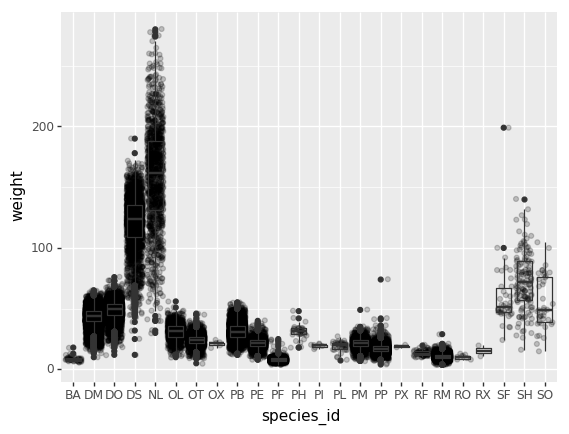

<ggplot: (7559990981)>

In [50]:

(weight_vs_species_id 
 + p9.geom_jitter(alpha=0.2)
 + p9.geom_boxplot(alpha=0.) )

# Plotting Time Series Data
Let's calculate the number of counts per year for each species. To do that, we need to gropup data first and count the species (`species_id`) within each group

In [57]:
yearly_counts = surveys_complete.groupby(['year','species_id'])['species_id'].count()
yearly_counts.to_frame()

species_id
year species_id            
1977 DM                 181
     DO                  12
     DS                  29
     OL                   1
     OX                   2
     PE                   2
     PF                  22
     PP                   3
     RM                   2
1978 DM                 336
     DO                  21
     DS                 272
     NL                  23
     OL                  35
     OT                  45
     PE                  12
     PF                  33
     PM                   2
     PP                  23
     RM                   2
     SH                   1
1979 DM                 183
     DO                  28
     DS                 183
     NL                  30
     OL                  43
     OT                  63
     PE                  16
     PF                  16
     PM                   6
...                     ...
2000 PP                 368
     RM                  15
     SH                   7
2001 DM                 292
     DO                  77
     NL                  44
     OT                 153
     PB                 520
     PE                  35
     PF                  26
     PI                   2
     PM                   3
     PP                 258
     RM                  15
     SH                   9
2002 DM                 302
     DO                 243
     NL                  42
     OL                   7
     OT                 119
     PB                 868
     PE                  57
     PF                  18
     PI                   5
     PM                   1
     PP                 375
     RM                  20
     RO                   7
     SF                   5
     SH                   9

[332 rows x 1 columns]

In [59]:
yearly_counts2 = yearly_counts.reset_index(name='counts')
yearly_counts2

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
5,1977,PE,2
6,1977,PF,22
7,1977,PP,3
8,1977,RM,2
9,1978,DM,336
